In [1]:
# Set up Kaggle API credentials
import os
os.environ['KAGGLE_USERNAME'] = 'mantanagnesgwanvalla'
os.environ['KAGGLE_KEY'] = '90240ce7797a4e0e5d56e9f28153031e'


In [2]:
# Install Kaggle API
!pip install kaggle

In [3]:
!kaggle datasets download -d awsaf49/cbis-ddsm-breast-cancer-image-dataset

Dataset URL: https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset
License(s): CC-BY-SA-3.0
100% 4.95G/4.95G [00:56<00:00, 148MB/s]
100% 4.95G/4.95G [00:56<00:00, 94.6MB/s]


In [4]:
!unzip cbis-ddsm-breast-cancer-image-dataset.zip -d cbis-ddsm-breast-cancer-image-dataset

Streaming output truncated to the last 5000 lines.
  inflating: cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295326067813319071803507885093865003464/1-076.jpg  
  inflating: cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/1-265.jpg  
  inflating: cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/2-266.jpg  
  inflating: cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg  
  inflating: cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg  
  inflating: cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295397487412067903910787953980192002590/1-233.jpg  
  inflating: cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/1-294.jpg  
  inflating: cbis-

In [5]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
#read the meta file and display the irst five columns
df_meta = pd.read_csv('/content/cbis-ddsm-breast-cancer-image-dataset/csv/meta.csv')
df_meta.head()

SeriesInstanceUID  \
0  1.3.6.1.4.1.9590.100.1.2.117041576511324414842...   
1  1.3.6.1.4.1.9590.100.1.2.438738396107617880132...   
2  1.3.6.1.4.1.9590.100.1.2.767416741131676463382...   
3  1.3.6.1.4.1.9590.100.1.2.296931352612305599800...   
4  1.3.6.1.4.1.9590.100.1.2.436657670120353100077...   

                                    StudyInstanceUID Modality  \
0  1.3.6.1.4.1.9590.100.1.2.229361142710768138411...       MG   
1  1.3.6.1.4.1.9590.100.1.2.195593486612988388325...       MG   
2  1.3.6.1.4.1.9590.100.1.2.257901172612530623323...       MG   
3  1.3.6.1.4.1.9590.100.1.2.109468616710242115222...       MG   
4  1.3.6.1.4.1.9590.100.1.2.380627129513562450304...       MG   

  SeriesDescription BodyPartExamined  SeriesNumber Collection  Visibility  \
0   ROI mask images           BREAST             1  CBIS-DDSM           1   
1   ROI mask images           BREAST             1  CBIS-DDSM           1   
2   ROI mask images           BREAST             1  CBIS-DDSM           1   
3   ROI mask images           BREAST             1  CBIS-DDSM           1   
4   ROI mask images           BREAST             1  CBIS-DDSM           1   

   ImageCount  
0           2  
1           2  
2           2  
3           2  
4           2

In [7]:
# load dicom info file
df_dicom = pd.read_csv('/content/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
df_dicom.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [8]:
# check image types in dataset
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [9]:
# check image path in dataset
# cropped images
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
cropped_images.head(5)

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [10]:
#full mammogram images
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path
full_mammo.head(5)

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [11]:
# ROI images
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path
roi_img.head(5)

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [12]:
# set correct image path for image types
imdir = '/content/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [13]:
# change directory path of images
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

/content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

/content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

/content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [14]:
# change directory path of images
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

/content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

/content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

/content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [15]:
# organize image paths
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[4]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[4]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[4]
    roi_img_dict[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '/content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

In [16]:
# load the mass dataset
mass_train = pd.read_csv('/content/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')
mass_test = pd.read_csv('/content/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv')

mass_train.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [17]:
# fix image paths
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]
        img_name = img[12].split("/")[2]
        data.iloc[index,12] = cropped_images_dict[img_name]

# apply to datasets
fix_image_path(mass_train)
fix_image_path(mass_test)

In [18]:
# Get the number of images
num_full_mammo = len(full_mammo_dict)
num_cropped_images = len(cropped_images_dict)
num_roi_img = len(roi_img_dict)

# Print the counts
print(f'Number of full mammogram images: {num_full_mammo}')
print(f'Number of cropped images: {num_cropped_images}')
print(f'Number of ROI images: {num_roi_img}')


Number of full mammogram images: 2857
Number of cropped images: 3567
Number of ROI images: 3247


In [19]:
# check unique values in pathology column
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [20]:
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [21]:
# rename columns
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head(5)

patient_id  breast_density left_or_right_breast image_view  abnormality_id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality_type                          mass_shape   mass_margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image_file_path  \
0  /content/cbis-ddsm-breast-cancer-image-dataset...   
1  /content/cbis-ddsm-breast-cancer-image-dataset...   
2  /content/cbis-ddsm-breast-cancer-image-dataset...   
3  /content/cbis-ddsm-breast-cancer-image-dataset...   
4  /content/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped_image_file_path  \
0  /content/cbis-ddsm-breast-cancer-image-dataset...   
1  /content/cbis-ddsm-breast-cancer-image-dataset...   
2  /content/cbis-ddsm-breast-cancer-image-dataset...   
3  /content/cbis-ddsm-breast-cancer-image-dataset...   
4  /content/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI_mask_file_path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [22]:
# check for null values
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [23]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].fillna(method='bfill')
mass_train['mass_margins'] = mass_train['mass_margins'].fillna(method='bfill')

#check null values
mass_train.isnull().sum()

<ipython-input-23-d453a9b50e4f>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mass_train['mass_shape'] = mass_train['mass_shape'].fillna(method='bfill')
<ipython-input-23-d453a9b50e4f>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mass_train['mass_margins'] = mass_train['mass_margins'].fillna(method='bfill')


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [24]:
# quantitative summary of features
mass_train.describe()

breast_density  abnormality_id   assessment     subtlety
count     1318.000000     1318.000000  1318.000000  1318.000000
mean         2.203338        1.116085     3.504552     3.965857
std          0.873774        0.467013     1.414609     1.102032
min          1.000000        1.000000     0.000000     0.000000
25%          2.000000        1.000000     3.000000     3.000000
50%          2.000000        1.000000     4.000000     4.000000
75%          3.000000        1.000000     4.000000     5.000000
max          4.000000        6.000000     5.000000     5.000000

In [25]:
# view mass_test
mass_test.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00016               4                 LEFT         CC               1   
1    P_00016               4                 LEFT        MLO               1   
2    P_00017               2                 LEFT         CC               1   
3    P_00017               2                 LEFT        MLO               1   
4    P_00032               3                RIGHT         CC               1   

  abnormality type mass shape   mass margins  assessment  pathology  subtlety  \
0             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
1             mass  IRREGULAR     SPICULATED           5  MALIGNANT         5   
2             mass      ROUND  CIRCUMSCRIBED           4  MALIGNANT         4   
3             mass      ROUND    ILL_DEFINED           4  MALIGNANT         4   
4             mass      ROUND       OBSCURED           0     BENIGN         2   

                                     image file path  \
0  /content/cbis-ddsm-breast-cancer-image-dataset...   
1  /content/cbis-ddsm-breast-cancer-image-dataset...   
2  /content/cbis-ddsm-breast-cancer-image-dataset...   
3  /content/cbis-ddsm-breast-cancer-image-dataset...   
4  /content/cbis-ddsm-breast-cancer-image-dataset...   

                             cropped image file path  \
0  /content/cbis-ddsm-breast-cancer-image-dataset...   
1  /content/cbis-ddsm-breast-cancer-image-dataset...   
2  /content/cbis-ddsm-breast-cancer-image-dataset...   
3  /content/cbis-ddsm-breast-cancer-image-dataset...   
4  /content/cbis-ddsm-breast-cancer-image-dataset...   

                                  ROI mask file path  
0  Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
3  Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....  
4  Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....

In [26]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [27]:
mass_test.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

VISUALIZATION

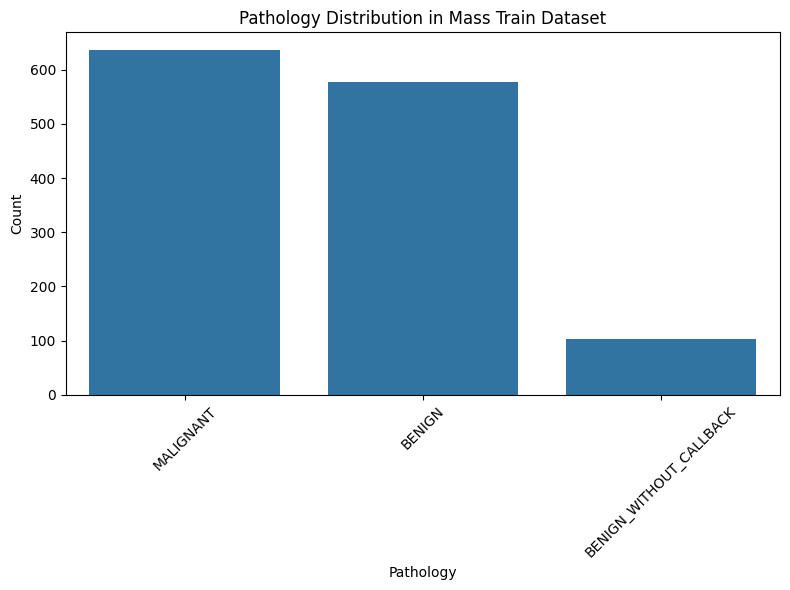

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pathology distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=mass_train, x='pathology')
plt.title('Pathology Distribution in Mass Train Dataset')
plt.xlabel('Pathology')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.tight_layout()
plt.show()


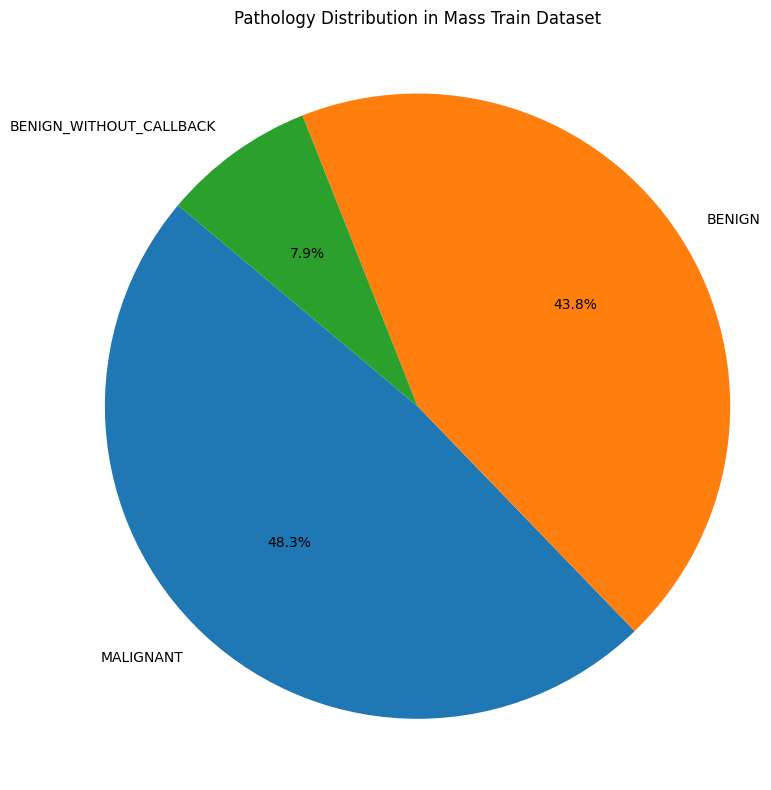

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate value counts and percentages
pathology_counts = mass_train['pathology'].value_counts()
pathology_percentages = pathology_counts / pathology_counts.sum() * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(pathology_counts, labels=pathology_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pathology Distribution in Mass Train Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


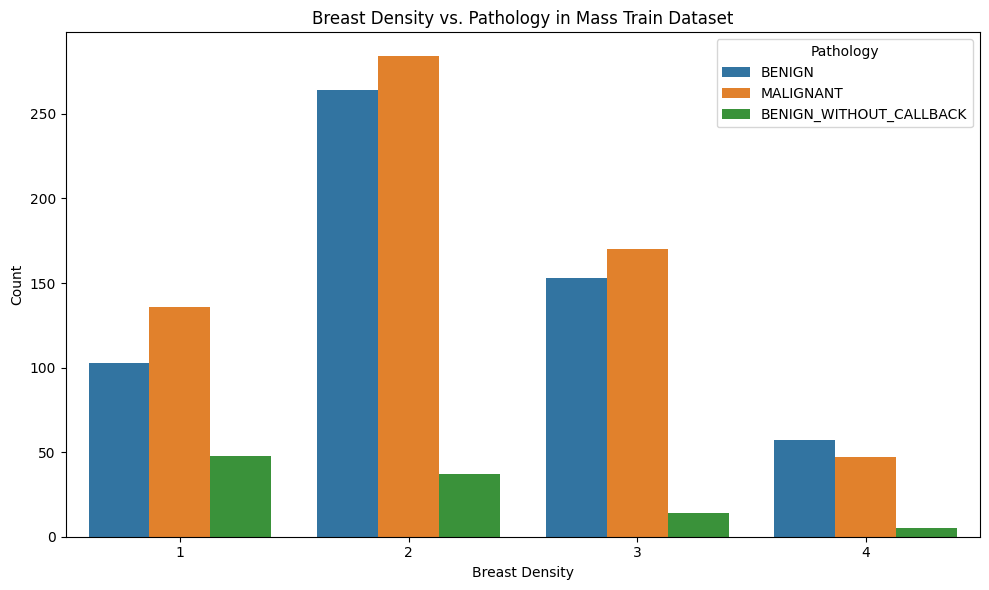

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot breast density against pathology
plt.figure(figsize=(10, 6))
sns.countplot(data=mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs. Pathology in Mass Train Dataset')
plt.xlabel('Breast Density')
plt.ylabel('Count')
plt.legend(title='Pathology')
plt.tight_layout()
plt.show()


Full Mammograms:



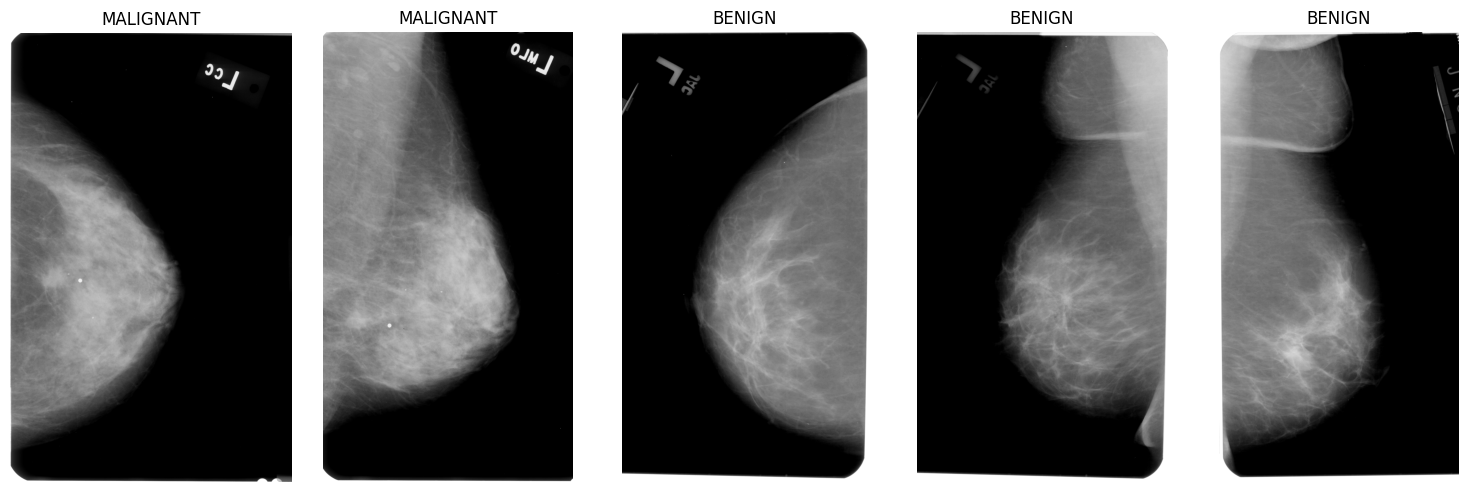

Cropped Mammograms:



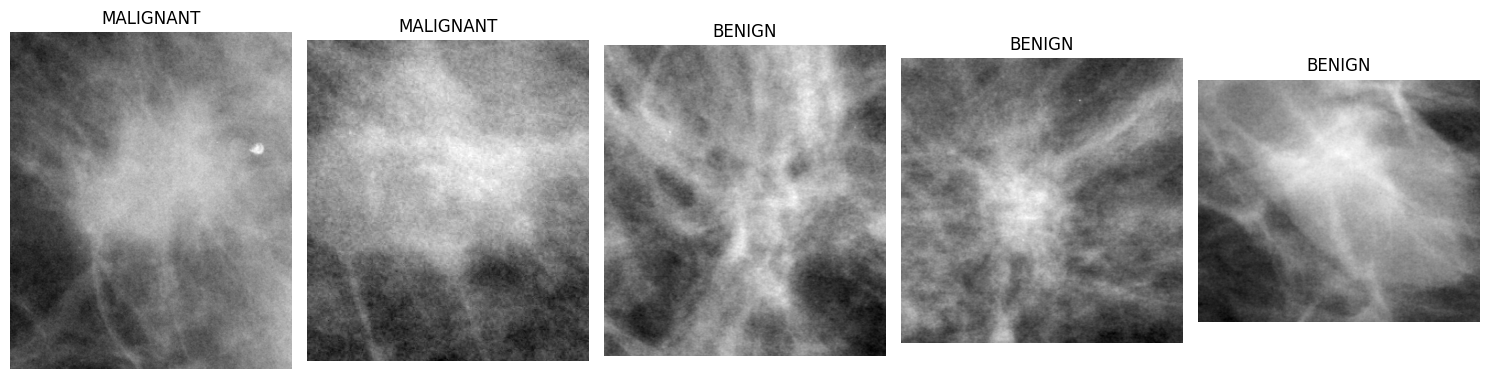

In [31]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images(column, number):
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)


In [32]:
pip install numpy opencv-python scipy pillow

# New Section

In [33]:
import os
import shutil

# Directories to store the organized images
cropped_dir = 'cropped_images'
roi_dir = 'roi_images'


# Create directories if they don't exist
os.makedirs(cropped_dir, exist_ok=True)
os.makedirs(roi_dir, exist_ok=True)


# Copy cropped images to the new directory
for key, img_path in cropped_images_dict.items():
    # Define the new path
    new_path = os.path.join(cropped_dir, os.path.basename(img_path))

    # Copy the image to the new directory
    shutil.copy(img_path, new_path)

# Copy ROI images to the new directory
for key, img_path in roi_img_dict.items():
    # Define the new path
    new_path = os.path.join(roi_dir, os.path.basename(img_path))

    # Copy the image to the new directory
    shutil.copy(img_path, new_path)



    # Copy the image to the new directory
    shutil.copy(img_path, new_path)
print("Cropped and ROI  images have been organized into their respective directories.")


Cropped and ROI  images have been organized into their respective directories.


Processed and saved final output for /content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
Processed and saved final output for /content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.jpg
Processed and saved final output for /content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.210396893911234385024533119100226540488/1-128.jpg
Processed and saved final output for /content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.74956658311383957201426978750903861062/1-248.jpg
Processed and saved final output for /content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.98765885412946410823689524902893984551/1-007.jpg
Processed and saved final output for /content/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.362722981912364196037055929741492450134/1-074.jpg
Processed and save

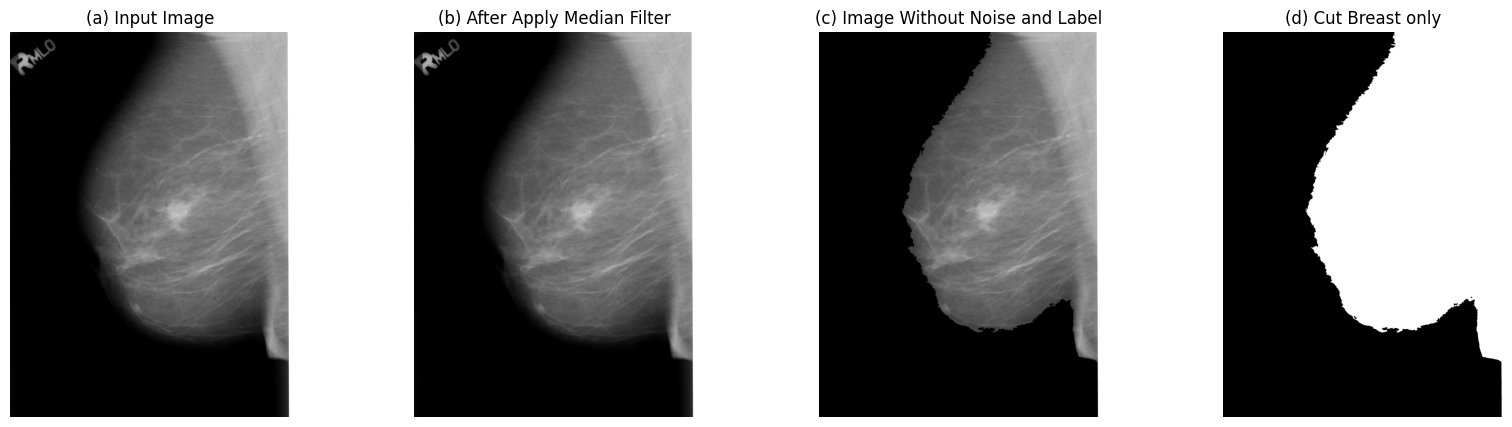

Preprocessing complete!


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
import os
import random

# Function to apply a median filter to an image
def apply_median_filter(image, ksize=5):
    return cv2.medianBlur(image, ksize)

# Function to convert an image to binary using Otsu's thresholding
def convert_to_binary_otsu(image):
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

# Function to remove artifacts using morphological operations
def remove_artifacts(binary_image, min_area=500):
    # Remove small objects
    clean_binary_image = morphology.remove_small_objects(binary_image > 0, min_size=min_area)
    clean_binary_image = clean_binary_image.astype(np.uint8) * 255

    # Further clean up using morphological operations
    kernel = np.ones((5, 5), np.uint8)
    clean_binary_image = cv2.morphologyEx(clean_binary_image, cv2.MORPH_CLOSE, kernel)
    clean_binary_image = cv2.morphologyEx(clean_binary_image, cv2.MORPH_OPEN, kernel)

    return clean_binary_image

# Function to segment the breast area
def segment_breast_area(image):
    ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        breast_contour = max(contours, key=cv2.contourArea)
        mask = np.zeros_like(image)
        cv2.drawContours(mask, [breast_contour], -1, 255, thickness=cv2.FILLED)

        segmented_image = cv2.bitwise_and(image, image, mask=mask)
        return segmented_image
    else:
        return image

# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(20, 5))

    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')

    plt.show()

# Ensure full_mammo is a list
image_paths = full_mammo.tolist()  # Convert to a list if it's a pandas Series or similar

# Check if there are any images to process
if not image_paths:
    print("No images found in the provided list.")
else:
    # Directory to save processed images
    output_dir = 'processed_images'
    os.makedirs(output_dir, exist_ok=True)

    # Process and save images
    for image_path in image_paths:
        # Load the original image
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Apply the median filter to the image
        median_filtered_image = apply_median_filter(original_image)

        # Segment the breast area
        segmented_image = segment_breast_area(median_filtered_image)

        # Convert the segmented image to binary using Otsu's thresholding
        binary_image = convert_to_binary_otsu(segmented_image)

        # Remove artifacts from the binary image
        cleaned_image = remove_artifacts(binary_image)

        # Save only the final cleaned image
        base_filename = os.path.basename(image_path).split('.')[0]
        cv2.imwrite(os.path.join(output_dir, f'{base_filename}.png'), cleaned_image)

        print(f"Processed and saved final output for {image_path}")

    # Select and display a random image for verification
    random_image_path = random.choice(image_paths)
    base_filename = os.path.basename(random_image_path).split('.')[0]

    # Load the images (since the intermediate images are not saved, we will reuse the images in memory)
    original_image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)
    median_filtered_image = apply_median_filter(original_image)
    segmented_image = segment_breast_area(median_filtered_image)
    binary_image = convert_to_binary_otsu(segmented_image)
    cleaned_image = remove_artifacts(binary_image)

    # Display the images
    images = [original_image, median_filtered_image, segmented_image, cleaned_image]
    titles = ['(a) Input Image', '(b) After Apply Median Filter', '(c) Image Without Noise and Label', '(d) Cut Breast only']
    display_images(images, titles)

    print('Preprocessing complete!')


In [35]:
import cv2
import numpy as np
import os
import scipy.stats as stats
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops
import pandas as pd

# Directories containing the images
full_image_dir = '/content/processed_images'
cropped_image_dir = '/content/cropped_images'
roi_image_dir = '/content/roi_images'

# List to store the feature data
features_list = []

# Function to calculate first-order statistical features
def extract_first_order_features(image):
    pixel_values = image.flatten()

    # Calculate first-order statistical features
    mean = np.mean(pixel_values)
    variance = np.var(pixel_values)
    std_dev = np.std(pixel_values)
    skewness = stats.skew(pixel_values)
    kurtosis = stats.kurtosis(pixel_values)
    entropy = stats.entropy(np.histogram(pixel_values, bins=256)[0], base=2)

    return [mean, variance, std_dev, skewness, kurtosis, entropy]

# Function to extract Haralick-like features using skimage's GLCM
def extract_glcm_features(image):
    glcm = graycomatrix(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast').mean()
    dissimilarity = graycoprops(glcm, 'dissimilarity').mean()
    homogeneity = graycoprops(glcm, 'homogeneity').mean()
    energy = graycoprops(glcm, 'energy').mean()
    correlation = graycoprops(glcm, 'correlation').mean()
    asm = graycoprops(glcm, 'ASM').mean()
    return [contrast, dissimilarity, homogeneity, energy, correlation, asm]

# Function to extract LBP features
def extract_lbp_features(image):
    radius = 1  # LBP radius
    n_points = 8 * radius  # Number of points to consider for LBP
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-7)  # Normalize the histogram
    return lbp_hist

# Function to apply Gabor filter and extract features
def apply_gabor_filter(image):
    gabor_kernels = []
    ksize = 31  # Size of the filter
    for theta in np.arange(0, np.pi, np.pi / 8):
        kernel = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
        gabor_kernels.append(kernel)

    gabor_responses = []
    for kernel in gabor_kernels:
        filtered_img = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        gabor_responses.append(filtered_img.mean())  # You can change this to other statistics (e.g., std, max)

    return gabor_responses

# Function to process all images in a given directory
def process_images_from_directory(image_dir, output_csv):
    features_list = []

    for image_filename in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_filename)

        # Load the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Extract first-order statistical features
        first_order_features = extract_first_order_features(image)

        # Extract Haralick-like (GLCM) features
        glcm_features = extract_glcm_features(image)

        # Extract LBP features
        lbp_features = extract_lbp_features(image)

        # Apply Gabor filter and extract features
        gabor_features = apply_gabor_filter(image)

        # Combine all features into a single feature vector
        features = first_order_features + glcm_features + list(lbp_features) + gabor_features

        # Append the image filename and features to the list
        features_list.append([image_filename] + features)

    # Define the column names for the features
    first_order_columns = ['Mean', 'Variance', 'Standard Deviation', 'Skewness',
                        'Kurtosis', 'Entropy']
    glcm_columns = ['GLCM_Contrast', 'GLCM_Dissimilarity', 'GLCM_Homogeneity',
                    'GLCM_Energy', 'GLCM_Correlation', 'GLCM_ASM']
    lbp_columns = [f'LBP_{i}' for i in range(len(features_list[0][6:6+len(lbp_features)]))]  # LBP histogram bins
    gabor_columns = [f'Gabor_{i}' for i in range(len(gabor_features))]  # Gabor features

    columns = ['Filename'] + first_order_columns + glcm_columns + lbp_columns + gabor_columns

    # Create a DataFrame to store the features
    features_df = pd.DataFrame(features_list, columns=columns)

    # Save the features to a CSV file
    features_df.to_csv(output_csv, index=False)

    print(f"Feature extraction complete! Results saved to {output_csv}")

# Process images from each directory and save features to CSV files
process_images_from_directory(full_image_dir, 'full_image_features.csv')
process_images_from_directory(cropped_image_dir, 'cropped_image_features.csv')
process_images_from_directory(roi_image_dir, 'roi_image_features.csv')


Feature extraction complete! Results saved to full_image_features.csv
Feature extraction complete! Results saved to cropped_image_features.csv
Feature extraction complete! Results saved to roi_image_features.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import os

# Load the extracted features
#features_df = pd.read_csv('/content/full_image_features.csv')

# Load your dataset with labels
mass_train = pd.read_csv('/content/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')
mass_test = pd.read_csv('/content/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv')
calc_train = pd.read_csv('/content/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')
calc_test = pd.read_csv('/content/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv')

# Concatenate the datasets
full_mass = pd.concat([mass_train, mass_test], axis=0)
full_calc = pd.concat([calc_train, calc_test], axis=0)

#full_dataset = pd.concat([full_mass, full_calc], axis=0)

# Apply class mapper to pathology column
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0}
full_mass['label'] = full_mass['pathology'].replace(class_mapper)
full_calc['label'] = full_calc['pathology'].replace(class_mapper)
#full_calc['label'] = full_calc['pathology'].replace(class_mapper)

full_dataset = pd.concat([full_mass, full_calc], axis=0)

# Combine mass and calc datasets
#ull_dataset3 = pd.concat([full_mass, full_calc], axis=0)
# Now both mass_train and mass_test should have a new 'label' column with 0s and 1s
print(full_dataset[['pathology', 'label']].head())
#print(mass_test[['pathology', 'label']].head())

   pathology  label
0  MALIGNANT      1
1  MALIGNANT      1
2     BENIGN      0
3     BENIGN      0
4     BENIGN      0
   pathology  label
0  MALIGNANT      1
1  MALIGNANT      1
2     BENIGN      0
3     BENIGN      0
4     BENIGN      0


In [3]:
full_dataset.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001             3.0                 LEFT         CC               1   
1    P_00001             3.0                 LEFT        MLO               1   
2    P_00004             3.0                 LEFT         CC               1   
3    P_00004             3.0                 LEFT        MLO               1   
4    P_00004             3.0                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  label  breast density  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...      1             NaN   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...      1             NaN   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...      0             NaN   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...      0             NaN   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....      0             NaN   

  calc type calc distribution  
0       NaN               NaN  
1       NaN               NaN  
2       NaN               NaN  
3       NaN               NaN  
4       NaN               NaN

FULL IMAGES

In [4]:
import pandas as pd

# Load the extracted features
features_df = pd.read_csv('/content/full_image_features.csv')

# Function to normalize the Filename to match patient_id format
def normalize_filename(filename):
    # Replace '1-' or '2-' with 'P_'
    normalized = filename.replace('1-', 'P_').replace('2-', 'P_').replace('.png', '')

    # Extract the numeric part and pad it with leading zeros to ensure it matches patient ID format
    numeric_part = normalized.split('_')[-1]
    padded_numeric = numeric_part.zfill(5)

    # Recombine to form the final patient_id
    patient_id = f"P_{padded_numeric}"

    return patient_id

# Apply the normalization function to the Filename column
features_df['patient_id'] = features_df['Filename'].apply(normalize_filename)

# Print sample patient IDs to verify consistency
print("Sample patient IDs from features_df after normalization:")
print(features_df['patient_id'].head())

# Assuming full_dataset3['patient_id'] is already in the correct format and needs no further modification
print("\nSample patient IDs from full_dataset3:")
print(full_dataset['patient_id'].head())

# Merge features with labels based on 'patient_id'
merged_df = pd.merge(features_df, full_dataset[['patient_id', 'label']], on='patient_id', how='inner')

# Check if merged_df is empty
if merged_df.empty:
    print("\nUnmatched patient IDs in features_df:")
    unmatched_features_df = features_df[~features_df['patient_id'].isin(full_dataset['patient_id'])]
    print(unmatched_features_df['patient_id'].unique())

    print("\nUnmatched patient IDs in full_dataset3:")
    unmatched_full_dataset = full_dataset[~full_dataset['patient_id'].isin(features_df['patient_id'])]
    print(unmatched_full_dataset['patient_id'].unique())

    raise ValueError("No matching patient IDs found between features and dataset. Please verify the patient IDs.")
else:
    print("\nSuccessfully merged features with labels. Sample of merged dataframe:")
    print(merged_df.head())


Sample patient IDs from features_df after normalization:
0    P_00237
1    P_00119
2    P_00019
3    P_00129
4    P_00009
Name: patient_id, dtype: object

Sample patient IDs from full_dataset3:
0    P_00001
1    P_00001
2    P_00004
3    P_00004
4    P_00004
Name: patient_id, dtype: object

Successfully merged features with labels. Sample of merged dataframe:
    Filename        Mean      Variance  Standard Deviation  Skewness  \
0  1-119.png  131.841325  16237.402896          127.426068 -0.068139   
1  1-119.png  131.841325  16237.402896          127.426068 -0.068139   
2  1-019.png  105.386162  15767.228161          125.567624  0.352222   
3  1-019.png  105.386162  15767.228161          125.567624  0.352222   
4  1-129.png  117.638779  16159.006328          127.118080  0.155151   

   Kurtosis   Entropy  GLCM_Contrast  GLCM_Dissimilarity  GLCM_Homogeneity  \
0 -1.995357  0.999164      45.761064            0.179455          0.999296   
1 -1.995357  0.999164      45.761064            0

In [5]:
# Separate features and target labels
X = merged_df.drop(columns=[ 'Filename','patient_id', 'label'])  # Features
y = merged_df['label']  # Target labels

# Split the data into training and test sets (using 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 424
Test set size: 107


In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM with RBF kernel and balanced class weights
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=30)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_svm_model = grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluate the model
print("Best SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Save the model to a file
model_filename = 'best_svm_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_svm_model, file)

print(f"Model saved to {model_filename}")

Best SVM Model
Accuracy: 0.8785046728971962
Confusion Matrix:
 [[58  7]
 [ 6 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        65
           1       0.84      0.86      0.85        42

    accuracy                           0.88       107
   macro avg       0.87      0.87      0.87       107
weighted avg       0.88      0.88      0.88       107

Model saved to best_svm_model.pkl


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
print("Best Random Forest Model after Fine-Tuning")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Best Random Forest Model after Fine-Tuning
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.897196261682243
Confusion Matrix:
 [[59  6]
 [ 5 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91        65
           1       0.86      0.88      0.87        42

    accuracy                           0.90       107
   macro avg       0.89      0.89      0.89       107
weighted avg       0.90      0.90      0.90       107



ROI IMAGES

In [9]:
import pandas as pd

# Load the extracted features
features_df = pd.read_csv('/content/roi_image_features.csv')

# Function to normalize the Filename to match patient_id format
def normalize_filename(filename):
    # Replace '1-' or '2-' with 'P_'
    normalized = filename.replace('1-', 'P_').replace('2-', 'P_').replace('.jpg', '')

    # Extract the numeric part and pad it with leading zeros to ensure it matches patient ID format
    numeric_part = normalized.split('_')[-1]
    padded_numeric = numeric_part.zfill(5)

    # Recombine to form the final patient_id
    patient_id = f"P_{padded_numeric}"

    return patient_id

# Apply the normalization function to the Filename column
features_df['patient_id'] = features_df['Filename'].apply(normalize_filename)

# Print sample patient IDs to verify consistency
print("Sample patient IDs from features_df after normalization:")
print(features_df['patient_id'].head())

# Assuming full_dataset3['patient_id'] is already in the correct format and needs no further modification
print("\nSample patient IDs from full_dataset3:")
print(full_dataset['patient_id'].head())

# Merge features with labels based on 'patient_id'
merged_df = pd.merge(features_df, full_dataset[['patient_id', 'label']], on='patient_id', how='inner')

# Check if merged_df is empty
if merged_df.empty:
    print("\nUnmatched patient IDs in features_df:")
    unmatched_features_df = features_df[~features_df['patient_id'].isin(full_dataset['patient_id'])]
    print(unmatched_features_df['patient_id'].unique())

    print("\nUnmatched patient IDs in full_dataset3:")
    unmatched_full_dataset = full_dataset[~full_dataset['patient_id'].isin(features_df['patient_id'])]
    print(unmatched_full_dataset['patient_id'].unique())

    raise ValueError("No matching patient IDs found between features and dataset. Please verify the patient IDs.")
else:
    print("\nSuccessfully merged features with labels. Sample of merged dataframe:")
    print(merged_df.head())


Sample patient IDs from features_df after normalization:
0    P_00098
1    P_00208
2    P_00080
3    P_00259
4    P_00100
Name: patient_id, dtype: object

Sample patient IDs from full_dataset3:
0    P_00001
1    P_00001
2    P_00004
3    P_00004
4    P_00004
Name: patient_id, dtype: object

Successfully merged features with labels. Sample of merged dataframe:
    Filename      Mean    Variance  Standard Deviation   Skewness    Kurtosis  \
0  1-098.jpg  1.032106  261.946155           16.184751  15.623015  242.080164   
1  1-098.jpg  1.032106  261.946155           16.184751  15.623015  242.080164   
2  1-098.jpg  1.032106  261.946155           16.184751  15.623015  242.080164   
3  1-098.jpg  1.032106  261.946155           16.184751  15.623015  242.080164   
4  1-098.jpg  1.032106  261.946155           16.184751  15.623015  242.080164   

    Entropy  GLCM_Contrast  GLCM_Dissimilarity  GLCM_Homogeneity  ...  \
0  0.042433       6.550455             0.02681          0.999531  ...   
1  0.

In [10]:
# Separate features and target labels
X = merged_df.drop(columns=['Filename', 'patient_id', 'label'])  # Features
y = merged_df['label']  # Target labels

# Split the data into training and test sets (using 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 831
Test set size: 208


In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM with RBF kernel and balanced class weights
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=30)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_svm_model = grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluate the model
print("Best SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Best SVM Model
Accuracy: 0.8557692307692307
Confusion Matrix:
 [[108  12]
 [ 18  70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       120
           1       0.85      0.80      0.82        88

    accuracy                           0.86       208
   macro avg       0.86      0.85      0.85       208
weighted avg       0.86      0.86      0.85       208



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
print("Best Random Forest Model after Fine-Tuning")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Best Random Forest Model after Fine-Tuning
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8653846153846154
Confusion Matrix:
 [[107  13]
 [ 15  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       120
           1       0.85      0.83      0.84        88

    accuracy                           0.87       208
   macro avg       0.86      0.86      0.86       208
weighted avg       0.87      0.87      0.87       208



CROPPED IMAGES

In [13]:
import pandas as pd

# Load the extracted features
features_df = pd.read_csv('/content/cropped_image_features.csv')

# Function to normalize the Filename to match patient_id format
def normalize_filename(filename):
    # Replace '1-' or '2-' with 'P_'
    normalized = filename.replace('1-', 'P_').replace('2-', 'P_').replace('.jpg', '')

    # Extract the numeric part and pad it with leading zeros to ensure it matches patient ID format
    numeric_part = normalized.split('_')[-1]
    padded_numeric = numeric_part.zfill(5)

    # Recombine to form the final patient_id
    patient_id = f"P_{padded_numeric}"

    return patient_id

# Apply the normalization function to the Filename column
features_df['patient_id'] = features_df['Filename'].apply(normalize_filename)

# Print sample patient IDs to verify consistency
print("Sample patient IDs from features_df after normalization:")
print(features_df['patient_id'].head())

# Assuming full_dataset3['patient_id'] is already in the correct format and needs no further modification
print("\nSample patient IDs from full_dataset3:")
print(full_dataset['patient_id'].head())

# Merge features with labels based on 'patient_id'
merged_df = pd.merge(features_df, full_dataset[['patient_id', 'label']], on='patient_id', how='inner')

# Check if merged_df is empty
if merged_df.empty:
    print("\nUnmatched patient IDs in features_df:")
    unmatched_features_df = features_df[~features_df['patient_id'].isin(full_dataset['patient_id'])]
    print(unmatched_features_df['patient_id'].unique())

    print("\nUnmatched patient IDs in full_dataset3:")
    unmatched_full_dataset = full_dataset[~full_dataset['patient_id'].isin(features_df['patient_id'])]
    print(unmatched_full_dataset['patient_id'].unique())

    raise ValueError("No matching patient IDs found between features and dataset. Please verify the patient IDs.")
else:
    print("\nSuccessfully merged features with labels. Sample of merged dataframe:")
    print(merged_df.head())


Sample patient IDs from features_df after normalization:
0    P_00098
1    P_00208
2    P_00080
3    P_00259
4    P_00100
Name: patient_id, dtype: object

Sample patient IDs from full_dataset3:
0    P_00001
1    P_00001
2    P_00004
3    P_00004
4    P_00004
Name: patient_id, dtype: object

Successfully merged features with labels. Sample of merged dataframe:
    Filename        Mean     Variance  Standard Deviation  Skewness  Kurtosis  \
0  1-098.jpg  112.894637  1356.958369           36.836916 -0.642014 -0.258138   
1  1-098.jpg  112.894637  1356.958369           36.836916 -0.642014 -0.258138   
2  1-098.jpg  112.894637  1356.958369           36.836916 -0.642014 -0.258138   
3  1-098.jpg  112.894637  1356.958369           36.836916 -0.642014 -0.258138   
4  1-098.jpg  112.894637  1356.958369           36.836916 -0.642014 -0.258138   

    Entropy  GLCM_Contrast  GLCM_Dissimilarity  GLCM_Homogeneity  ...  \
0  7.094172      47.943822            5.441236          0.166939  ...   
1  7.

In [14]:
# Separate features and target labels
X = merged_df.drop(columns=['Filename', 'patient_id', 'label'])  # Features
y = merged_df['label']  # Target labels

# Split the data into training and test sets (using 80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 802
Test set size: 201


In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM with RBF kernel and balanced class weights
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=30)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_svm_model = grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluate the model
print("Best SVM Model")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Best SVM Model
Accuracy: 0.8507462686567164
Confusion Matrix:
 [[109  13]
 [ 17  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       122
           1       0.83      0.78      0.81        79

    accuracy                           0.85       201
   macro avg       0.85      0.84      0.84       201
weighted avg       0.85      0.85      0.85       201



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
print("Best Random Forest Model after Fine-Tuning")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Best Random Forest Model after Fine-Tuning
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8805970149253731
Confusion Matrix:
 [[113   9]
 [ 15  64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       122
           1       0.88      0.81      0.84        79

    accuracy                           0.88       201
   macro avg       0.88      0.87      0.87       201
weighted avg       0.88      0.88      0.88       201

